In [73]:
import tensorflow_addons as tfa
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import numpy as np
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Dropout,
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [74]:
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def r_square_loss(y_true, y_pred):
    from tensorflow.keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

In [195]:
# load data
x_train = pd.read_csv("./dat300-h2020-ca1/X_train.csv")
x_test = pd.read_csv("./dat300-h2020-ca1/X_test.csv")
y_train = pd.read_csv("./dat300-h2020-ca1/y_train.csv")

In [ ]:
# show columns with lots of zeros
#x_train = x_train.replace(0.0, np.nan)
#missing_values = x_train.isnull().sum()

In [ ]:
# drop columns with lots of zeros
#x_train = x_train.drop(columns=["Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
#                               "Fly Ash (component 3)(kg in a m^3 mixture)",
#                               "Superplasticizer (component 5)(kg in a m^3 mixture)"])

#x_test = x_test.drop(columns=["Blast Furnace Slag (component 2)(kg in a m^3 mixture)",
#                               "Fly Ash (component 3)(kg in a m^3 mixture)",
#                               "Superplasticizer (component 5)(kg in a m^3 mixture)"])

In [171]:
# remove outliers
print(x_train.shape)
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3-Q1
mask = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR))).any(axis=1)
print("Observations BEFORE removing outliers:", x_train.shape)
x_train = x_train[~mask]
print(x_train.shape)
y_train = y_train[~mask]
# X = X.values
# _test = x_test.values
print("Observations AFTER removing outliers:", x_train.shape)

(618, 8)
Observations BEFORE removing outliers: (618, 8)
(569, 8)
Observations AFTER removing outliers: (569, 8)


In [ ]:
# BOXPLOT
a = x_train.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5,4), sharex=False, sharey=False)

In [196]:
# StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [176]:
# MinMaxScaler
scaler = MinMaxScaler((0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [236]:
# keras ANN
#model.add(BatchNormalization())
sample_vector_length = x_train.shape[1]
model = Sequential([
                   Dense(2000, activation="relu", input_shape=(sample_vector_length,)),
                   Dense(2000, activation="relu"),
                   Dense(2000, activation="relu"),
                   Dense(1)])
model.compile(optimizer=tensorflow.keras.optimizers.Nadam(),
             loss= "mae",
             metrics=[r_square])

In [237]:
history = model.fit(x_train, y_train, epochs=300, validation_split=0.2, batch_size=20, verbose=1)

Epoch 1/300
25/25 [==============================] - 0s 17ms/step - loss: 15.4512 - r_square: -0.5736 - val_loss: 11.7027 - val_r_square: -0.0763
Epoch 2/300
25/25 [==============================] - 0s 13ms/step - loss: 11.8222 - r_square: -0.0021 - val_loss: 12.1809 - val_r_square: 0.0931
Epoch 3/300
25/25 [==============================] - 0s 14ms/step - loss: 11.0744 - r_square: 0.1109 - val_loss: 14.3297 - val_r_square: -0.1534
Epoch 4/300
25/25 [==============================] - 0s 13ms/step - loss: 9.7515 - r_square: 0.2805 - val_loss: 9.4988 - val_r_square: 0.4582
Epoch 5/300
25/25 [==============================] - 0s 13ms/step - loss: 8.4054 - r_square: 0.5195 - val_loss: 10.6819 - val_r_square: 0.2846
Epoch 6/300
25/25 [==============================] - 0s 14ms/step - loss: 8.2211 - r_square: 0.4326 - val_loss: 6.9113 - val_r_square: 0.6583
Epoch 7/300
25/25 [==============================] - 0s 14ms/step - loss: 7.5250 - r_square: 0.6011 - val_loss: 10.5061 - val_r_square: 0

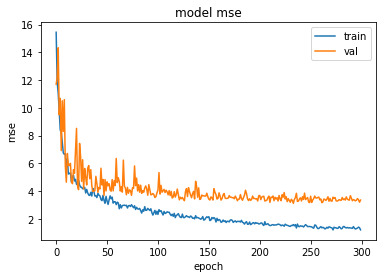

In [238]:
# plot mse metric
epochs_from_end = 300
epoch_x_values = list(range(len(history.history['loss'])-epochs_from_end, len(history.history['loss'])))
plt.plot(epoch_x_values, history.history['loss'][-epochs_from_end:])
plt.plot(epoch_x_values, history.history['val_loss'][-epochs_from_end:])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

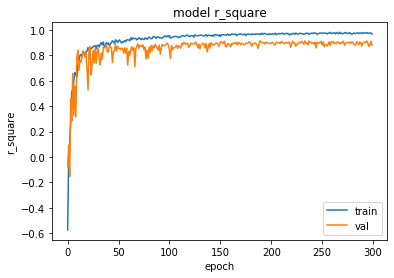

In [239]:
# plot r^2 metric
epochs_from_end = 300
epoch_x_values = list(range(len(history.history['r_square'])-epochs_from_end, len(history.history['r_square'])))
plt.plot(epoch_x_values, history.history['r_square'][-epochs_from_end:])
plt.plot(epoch_x_values, history.history['val_r_square'][-epochs_from_end:])
plt.title('model r_square')
plt.ylabel('r_square')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [240]:
# show some info about model and training to save for later reference
print("StandardScaler\n")
print(model.summary(), "\n")
print(history.params, "\n")
print(f"mean train loss last 10 epochs: {np.mean(history.history['loss'][-50:])}")
print(f"mean val loss last 10 epochs: {np.mean(history.history['val_loss'][-50:])}")
print(f"mean train r^2 last 10 epochs: {np.mean(history.history['r_square'][-50:])}")
print(f"mean val r^2 last 10 epochs: {np.mean(history.history['val_r_square'][-50:])}")

StandardScaler

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 2000)              18000     
_________________________________________________________________
dense_123 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dense_124 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 2001      
Total params: 8,024,001
Trainable params: 8,024,001
Non-trainable params: 0
_________________________________________________________________
None 

{'verbose': 1, 'epochs': 300, 'steps': 25} 

mean train loss last 10 epochs: 1.3516611957550049
mean val loss last 10 epochs: 3.3980874109268187
mean train r^2 last 10 epochs: 0.9742630445957183
mean val r^2 last 10 ep

In [205]:
# train new model on all traindata
pred_model = Sequential([ 
                   Dense(2000, activation="relu", input_shape=(sample_vector_length,)),
                   Dense(2000, activation="relu"),
                   Dense(2000, activation="relu"),
                   Dense(1)])
pred_model.compile(optimizer=tensorflow.keras.optimizers.Nadam(),
             loss="mse",
             metrics=[r_square])

In [206]:
pred_history = pred_model.fit(x_train, y_train, epochs=300, batch_size=25, verbose=1)

Epoch 1/300
25/25 [==============================] - 0s 13ms/step - loss: 362.7505 - r_square: -0.5331
Epoch 2/300
25/25 [==============================] - 0s 12ms/step - loss: 207.2518 - r_square: 0.1403
Epoch 3/300
25/25 [==============================] - 0s 12ms/step - loss: 190.5399 - r_square: 0.1426
Epoch 4/300
25/25 [==============================] - 0s 12ms/step - loss: 135.7376 - r_square: 0.4475
Epoch 5/300
25/25 [==============================] - 0s 12ms/step - loss: 84.4030 - r_square: 0.6306
Epoch 6/300
25/25 [==============================] - 0s 12ms/step - loss: 87.3410 - r_square: 0.6527
Epoch 7/300
25/25 [==============================] - 0s 13ms/step - loss: 58.6977 - r_square: 0.7546
Epoch 8/300
25/25 [==============================] - 0s 12ms/step - loss: 55.1634 - r_square: 0.7816
Epoch 9/300
25/25 [==============================] - 0s 12ms/step - loss: 64.1639 - r_square: 0.7016
Epoch 10/300
25/25 [==============================] - 0s 12ms/step - loss: 38.1574 - r

In [207]:
# make prediction on test data
y_pred = pred_model.predict(x_test)

In [241]:
y_pred = model.predict(x_test)

In [242]:
# save prediction to submission format
dfscore = pd.DataFrame(y_pred)
ID = np.arange(0, len(dfscore), dtype=np.int64)
dfID = pd.DataFrame(ID)
dfscore.columns = ["Predicted"]
dfID.columns = ["Id"]
final_df = pd.concat([dfID, dfscore], axis=1)
final_df.to_csv("Julius&Markus_comp1_ver1.16.csv", sep=",", index=False)

In [209]:
# show some info about model and training to save for later reference
print("standardscaler\n")
print(pred_model.summary(), "\n")
print(pred_history.params, "\n")
print(f"mean train loss last 10 epochs: {np.mean(pred_history.history['loss'][-10:])}")
print(f"mean train r^2 last 10 epochs: {np.mean(pred_history.history['r_square'][-10:])}")

standardscaler

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 2000)              18000     
_________________________________________________________________
dense_99 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dense_100 (Dense)            (None, 2000)              4002000   
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 2001      
Total params: 8,024,001
Trainable params: 8,024,001
Non-trainable params: 0
_________________________________________________________________
None 

{'verbose': 1, 'epochs': 300, 'steps': 25} 

mean train loss last 10 epochs: 5.234926700592041
mean train r^2 last 10 epochs: 0.9781667709350585
